In [1]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import matplotlib.pyplot as plt
import numpy as np
import random
import math
import time


In [2]:
#Test class for points bounded by a rectangle.
def Points_in_square(square, num_points):
  points = []

  x_coordinates, y_coordinates = zip(*square)
  min_x, min_y, max_x, max_y  = min(x_coordinates), min(y_coordinates), max(x_coordinates), max(y_coordinates)

  for _ in range(num_points):
    x = np.random.uniform(min_x, max_x)
    y = np.random.uniform(min_x, max_x)
    points.append([x,y])
  return points

In [3]:
#Test class for points bounded by a circle.
def Points_in_circle(r, x_center, y_center, num_points):
  points = []

  for _ in range(num_points):
      radius = r * math.sqrt(random.random())
      theta = 2 * math.pi * random.random()
      x = x_center + radius * math.cos(theta)
      y = y_center + radius * math.sin(theta)
      points.append([x, y])
  return points

In [4]:
def Points_exponential(num_points, min_range, max_range):
  points = []

  for _ in range(num_points):
    x = np.random.uniform(min_range, max_range)
    y = -math.pow(x, 2)
    points.append([x,y])
  return points

In [5]:
def Plot_hull(points, UH):
  arr_points = np.array(points)
  arr_UH = np.array(UH)
  plt.scatter(arr_points[:,0], arr_points[:,1], color='blue')
  plt.scatter(arr_UH[:,0], arr_UH[:,1],color='red')
  plt.show()

In [19]:
#Part C (Chan's Algorithm)
def CH_CH(points):
  UH = []

  #Line 2 in the pseudocode
  for i in range(1, int(np.ceil(np.log2(np.log2(len(points)))))):
    if UH == []:
      UH = UH_with_size(points, 2 **(2**i))
  return UH

def UH_with_size(points, size):
  #Dividing into arbitrary partitioning sizes
  part_num = int(np.ceil(len(points)/size))
  part = []
  for i in range(part_num):
    part.append(points[i*size:min((i+1)*size, len(points))])

  part_hull = []
  for i in range(len(part)):
    part_hull.append(INC_CH(part[i]))

  p_min = min(points)
  hull = []

  for _ in range(min(size,len(points))):
    hull.append(p_min)

    tan = []
    for i in range(part_num):
      if len(part_hull[i]) == 0: continue
      elif len(part_hull[i]) == 1: tan.append(part_hull[i][0])
      else:
        tan_point = tangent_search(part_hull[i], p_min, 0, len(part_hull[i]))
        tan.append(tan_point)
      end = tan[0]

    #Same check as in Gift Wrapping
    for i in range(len(tan)):
      if end == p_min:
        end = tan[i]
      elif sidednesstest(p_min, end, tan[i]):
        end = tan[i]
    p_min = end

    for i in range(part_num):
      points_to_remove = []
      part_half_hull = part_hull[i]
      for j in range(len(part_half_hull)):
        if part_half_hull[j][0] < p_min[0]:
          points_to_remove.append(j)
        else:
          break

      points_to_remove.reverse()
      for j in points_to_remove:
       part_hull[i].pop(j)

    if p_min == max(points):
      break
  if p_min == max(points):
    return hull
  else:
    return []

def tangent_search(arr, p_min , start, end):
  middle_index = int(math.floor((start + end)/2))
  middle = arr[middle_index]
  below_l = True
  below_r = True
  if middle_index + 1 < len(arr): below_r = tanSide(p_min, middle, arr[middle_index+1])
  if middle_index - 1 >= 0: below_l = tanSide(p_min, middle, arr[middle_index-1])

  if below_l == True and below_r == True:
    if middle == p_min:
      arr.pop(middle_index)
      return tangent_search(arr, p_min, 0, len(arr))
    return middle
  if below_r: return tangent_search(arr, p_min, start, middle_index-1)
  else: return tangent_search(arr, p_min, middle_index+1, end)


def sidednesstest(p1, p2, p3):
  sign = p1[0]*(p2[1] - p3[1]) + p2[0]*(p3[1]-p1[1])+p3[0]*(p1[1] - p2[1])
  return sign > 0

def tanSide(p1, p2, p3):
  fun = lambda x: x <= 0
  sign = p1[0]*(p2[1] - p3[1]) + p2[0]*(p3[1]-p1[1])+p3[0]*(p1[1] - p2[1])
  return fun(sign)


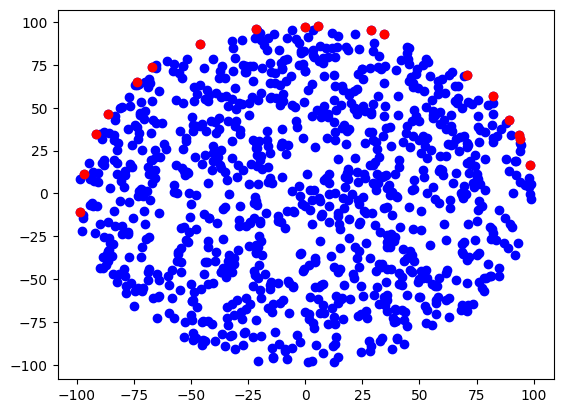

In [20]:
#Test for Chan's algorithm with circle test class
points = Points_in_circle(100, 0, 0, 1000)

UH = CH_CH(points)

Plot_hull(points, UH)

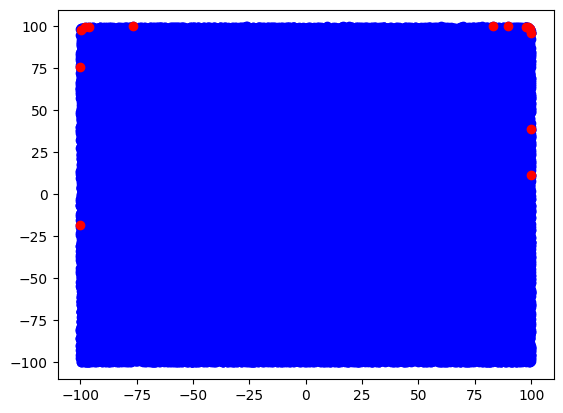

In [21]:
#Test for Chan's algorithm with square test class
x_min, y_min, x_max, y_max = -100,-100, 100, 100
square = [[x_min, y_min],[x_max, y_max]]

points = Points_in_square(square, 100000)
UH = CH_CH(points)

Plot_hull(points, UH)

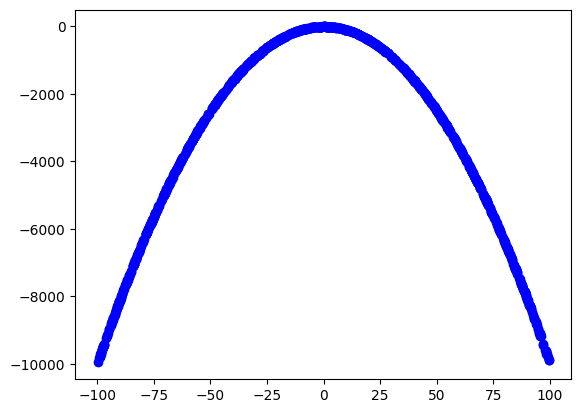

In [22]:
#Test for Chan's algorithm with exponential test class
points = Points_exponential(1000, -100, 100)
UH = CH_CH(points)

arr_points = np.array(points)
arr_UH = np.array(UH)
plt.scatter(arr_points[:,0], arr_points[:,1], color='blue')
plt.show()